In [6]:
import pystan
import arviz

In [16]:
model = """
data {
  real<lower=0> noise;
  int<lower=1> K; // number of states
  int<lower=1> N;
  real y[N];
}

parameters {
  simplex[K] theta[K];  // transit probs
}

model {
  real acc[K];
  real gamma[N,K];
  for (k in 1:K)
    gamma[1,k] = normal_lpdf(y[1]|k-1, noise);
  for (t in 2:N) {
    for (k in 1:K) {
      for (j in 1:K)
        acc[j] = gamma[t-1,j] + log(theta[j,k]) + normal_lpdf(y[t]|k-1, noise);
      gamma[t,k] = log_sum_exp(acc);
    }
  }
  target += log_sum_exp(gamma[N]);
}

"""

In [17]:
hmm = pystan.StanModel(model_code = model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_db2273df3696b5b6883f6c2371690c26 NOW.


In [18]:
data = {
    'noise': 1,
    'K' : 3,
    'N' : 16,
    'y' : [1.9, 1.8, 1.7, 1.0, 1.025, -4.0, -1.0, 0.9, 1.0, 1.13, 1.45, 7, 1.2, 1.3, 0, 0]
}

In [19]:
fit = hmm.sampling(data=data, iter=1000, chains=4)

In [20]:
print(fit)

Inference for Stan model: anon_model_db2273df3696b5b6883f6c2371690c26.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1,1]   0.44  5.0e-3   0.23   0.03   0.27   0.44   0.61   0.85   2091    1.0
theta[2,1]   0.32  4.0e-3   0.21   0.02   0.15   0.29   0.46   0.79   2716    1.0
theta[3,1]   0.28  4.3e-3    0.2   0.01   0.11   0.24   0.42   0.74   2211    1.0
theta[1,2]   0.32  4.8e-3   0.23   0.01   0.13   0.28   0.49   0.82   2307    1.0
theta[2,2]   0.32  4.5e-3   0.22   0.01   0.14   0.28   0.48   0.79   2436    1.0
theta[3,2]   0.37  4.6e-3   0.23   0.02   0.18   0.35   0.53   0.84   2425    1.0
theta[1,3]   0.24  3.6e-3   0.19 9.2e-3   0.09   0.19   0.35    0.7   2655    1.0
theta[2,3]   0.36  4.8e-3   0.22   0.02   0.17   0.33   0.52   0.84   2167    1.0
theta[3,3]   0.36  4.5e-3   0.22   0.02   0.17   0.34   0.52   0.79   2325 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022717453B88>,
      dtype=object)

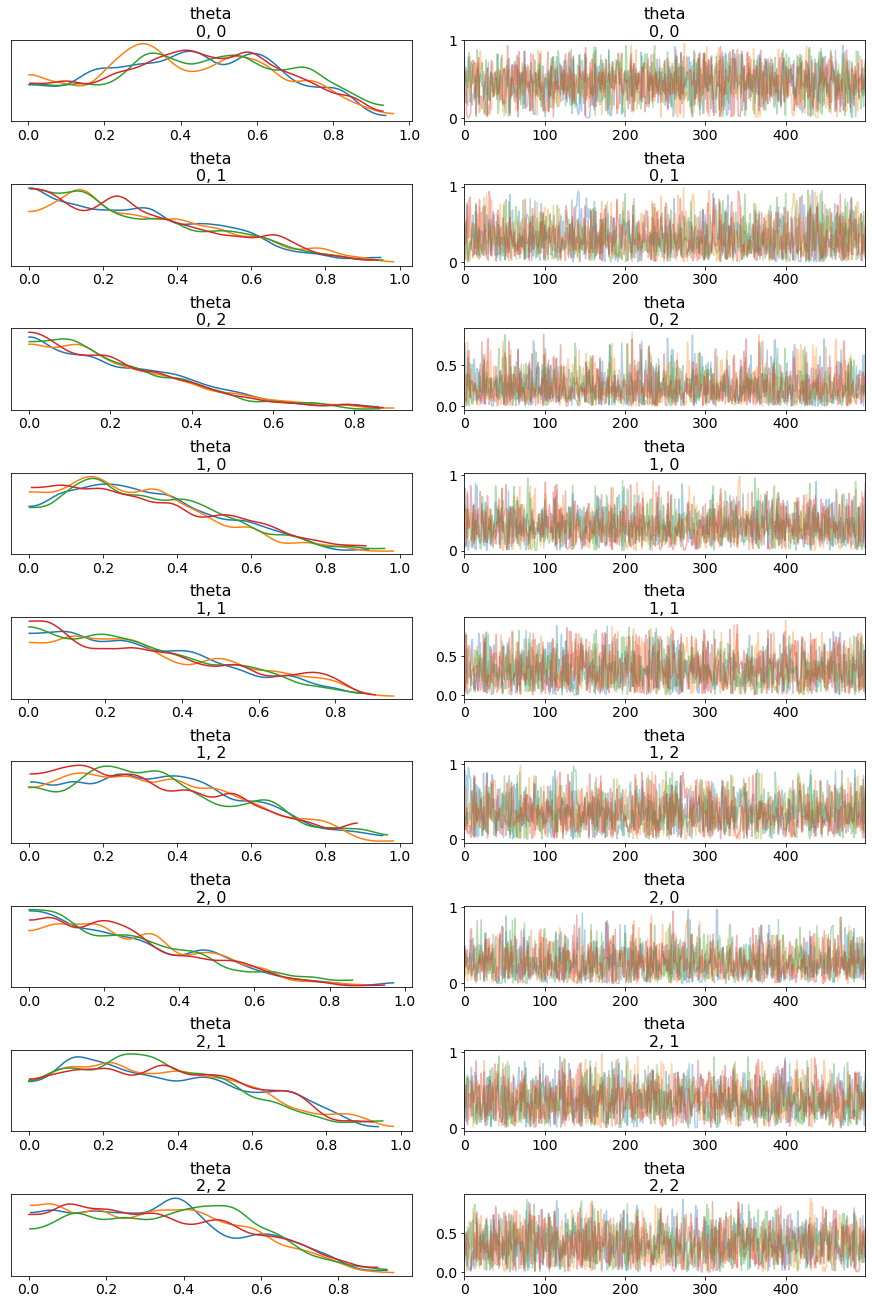

In [21]:
arviz.plot_trace(fit)